In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Read in the data
df = pd.read_csv('sleep_health_and_lifestyle_dataset.csv')

# Drop data we're not using
data = df.copy().drop(['Person ID', 'Occupation', 'Sleep Disorder', 'Blood Pressure'], axis = 1)

# Rename columns
data.rename(columns = {'BMI Category': 'BMI', 'Quality of Sleep': 'Sleep Quality', 'Physical Activity Level': 'Physical Activity'}, inplace = True)

# Convert BMI normal weight -> normal
data['BMI'] = np.where(data['BMI'] == 'Normal Weight', 'Normal', data['BMI'])


# Convert categorical data to numerical data
# Convert BMI strings to numbers
data['BMI'].replace(["Normal", "Overweight", "Obese"], [0, 1, 2], inplace=True)

# Convert Gender Strings to Numbers: Male to 1 and Female to 0
data['Gender'] = np.where(data['Gender'] == 'Male', 1, 0)

In [38]:
# Consider what predictor variables we want to use
sleepDuration = data['Sleep Duration']
sleepQuality = data['Sleep Quality']
stressLevel = data['Stress Level']
# bmi = data['BMI']

# Create a dataframe with the predictor variables
pred = pd.DataFrame(data={'Sleep Duration': sleepDuration, 'Sleep Quality': sleepQuality, 'Stress Level': stressLevel})

# Drop class we want to predict: Stress Level
X = pred.copy().drop(['Stress Level'], axis=1)
y = pred['Stress Level']

In [39]:
# linear regression model

# mseTrainSum, mseTestSum, r2TrainSum, r2TestSum = 0, 0, 0, 0
# epochs = 100

# for i in range(1, epochs+1):

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_test.shape, y_test.shape)

# Create the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_trainPred = lr.predict(X_train)
y_testPred = lr.predict(X_test)

# Round the predictions to the nearest integer
y_trainPred = np.round(y_trainPred)
y_testPred = np.round(y_testPred)

# # Calculate MSE & R^2
# mseTrain, mseTest = mean_squared_error(y_train, y_trainPred), mean_squared_error(y_test, y_testPred)
# r2Train, r2Test = r2_score(y_train, y_trainPred), r2_score(y_test, y_testPred)

#     # Add to the average
#     mseTrainSum += mseTrain
#     mseTestSum += mseTest
#     r2TrainSum += r2Train
#     r2TestSum += r2Test

# # Print results
# print("Results for Linear Regression Model")
# print(f'\nAverage Train MSE: {mseTrainSum / epochs}')
# print(f'Average Train R^2: {r2TrainSum / epochs }\n')
# print(f'Average Test MSE: {mseTestSum / epochs}')
# print(f'Average Test R^2: {r2TestSum / epochs}')

(75, 2) (75,)


In [40]:
from sklearn.model_selection import cross_val_score

# Calculate Cross Validation Scores for 15 folds
r2Train = cross_val_score(lr, X_train, y_train, cv=15, scoring='r2')
mseTrain = -1 * cross_val_score(lr, X_train, y_train, cv=15, scoring='neg_mean_squared_error')
r2Test = cross_val_score(lr, X_test, y_test, cv=15, scoring='r2')
mseTest = -1 * cross_val_score(lr, X_test, y_test, cv=15, scoring='neg_mean_squared_error')

print(f'Mean Squared Error Train: {mseTrain}\n')
print(f'R^2 Train: {r2Train}\n')

print(f'Average Mean Squared Error Train: {np.mean(mseTrain)}')
print(f'Average R^2 Train: {np.mean(r2Train)}\n')

print(f'Mean Squared Error Test: {mseTest}\n')
print(f'R^2 Test: {r2Test}\n')

print(f'Average Mean Squared Error Test: {np.mean(mseTest)}')
print(f'Average R^2 Test: {np.mean(r2Test)}')

Mean Squared Error Train: [0.46333473 0.54030238 0.33916656 0.81561602 0.43890358 0.52280575
 0.93878488 0.55133565 0.72867958 0.59687158 0.26784918 0.86167388
 0.52291602 0.65103131 1.28719773]

R^2 Train: [0.82110628 0.85504966 0.89155346 0.79299086 0.86284263 0.85314445
 0.49186204 0.81683201 0.73283975 0.80915377 0.92736293 0.76960591
 0.87916441 0.56233189 0.31664944]

Average Mean Squared Error Train: 0.6350979216634502
Average R^2 Train: 0.758832633905227

Mean Squared Error Test: [0.986893   0.06750492 0.51535364 0.24759989 1.1721074  0.31211676
 0.18614026 0.41746208 0.36392649 0.18274619 1.0565733  0.45354639
 0.54137407 0.69329699 0.86063323]

R^2 Test: [-0.23361625  0.97890471  0.76993141  0.87620005  0.6592711   0.84394162
  0.88366234  0.8509064   0.83753282  0.95689948  0.62265239  0.90225293
  0.84961831  0.4902228   0.77110818]

Average Mean Squared Error Test: 0.5371516420569977
Average R^2 Test: 0.7372992204245369


     Sleep Duration  Sleep Quality
340             8.1              9
157             7.2              8
337             8.4              9
28              7.9              7
322             8.4              9
..              ...            ...
123             7.2              8
136             7.1              8
98              7.1              8
329             8.5              9
80              5.8              4

[299 rows x 2 columns]


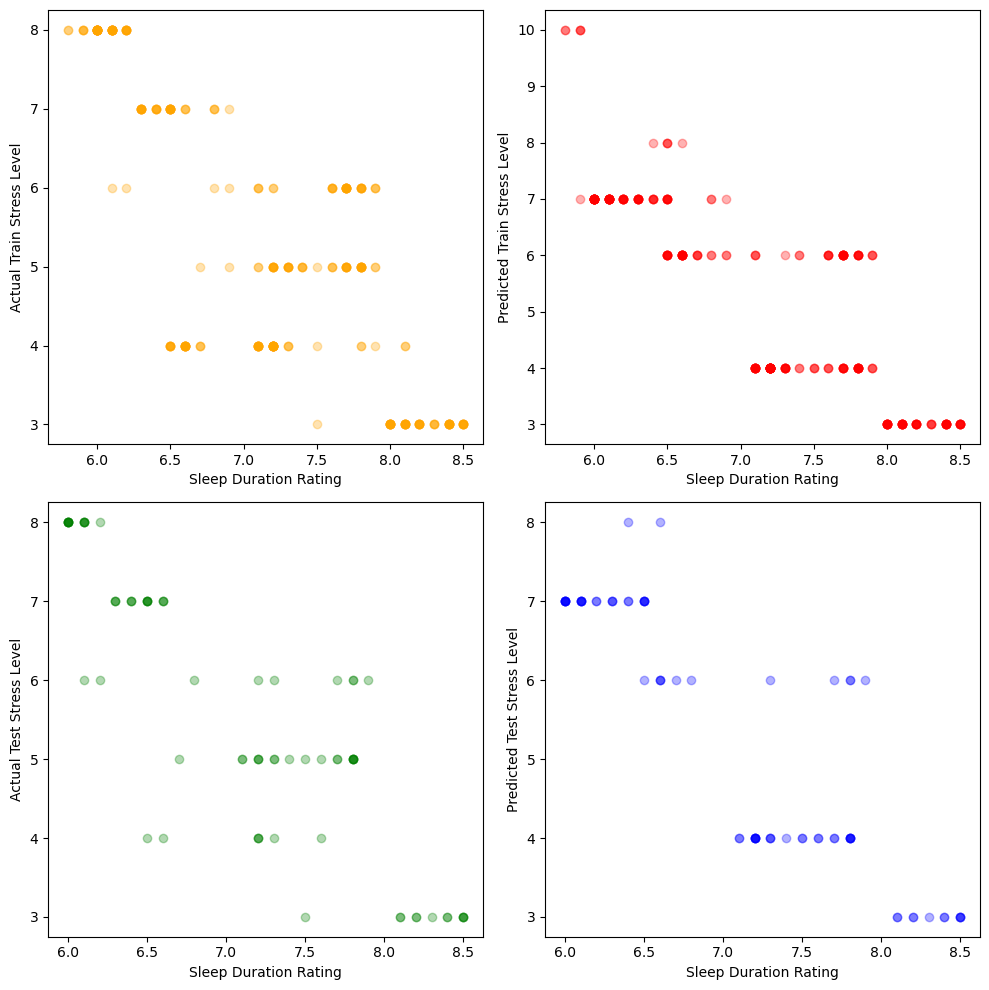

In [41]:
# Create scatterplots for train sleep duration & predicted train stress level

fig, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.flatten()

print(X_train)

# Plot Train Data vs Train Predictions
axes[0].scatter(x=X_train['Sleep Duration'], y=y_train, color='orange', alpha=0.3)
axes[0].set(xlabel='Sleep Duration Rating', ylabel='Actual Train Stress Level')
axes[1].scatter(x=X_train['Sleep Duration'], y=y_trainPred, color='red', alpha=0.3)
axes[1].set(xlabel='Sleep Duration Rating', ylabel='Predicted Train Stress Level')

# Plot Test Data vs Test Predictions
axes[2].scatter(x=X_test['Sleep Duration'], y=y_test, color='green', alpha=0.3)
axes[2].set(xlabel='Sleep Duration Rating', ylabel='Actual Test Stress Level')
axes[3].scatter(x=X_test['Sleep Duration'], y=y_testPred, color='blue', alpha=0.3)
axes[3].set(xlabel='Sleep Duration Rating', ylabel='Predicted Test Stress Level')
plt.tight_layout()
plt.show()

c:\Users\ryyu4\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MLR Training Classification Report:               precision    recall  f1-score   support

           3       0.98      0.97      0.97        58
           4       0.60      0.91      0.72        54
           5       0.84      0.55      0.67        56
           6       0.84      0.73      0.78        37
           7       1.00      0.81      0.90        37
           8       0.93      1.00      0.97        57

    accuracy                           0.84       299
   macro avg       0.87      0.83      0.83       299
weighted avg       0.86      0.84      0.84       299

Accuracy: 0.8361204013377926

MLR Testing Classification Report:               precision    recall  f1-score   support

           3       0.93      1.00      0.96        13
           4       0.78      0.88      0.82        16
           5       0.88      0.64      0.74        11
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        13
           8       1.00      1.

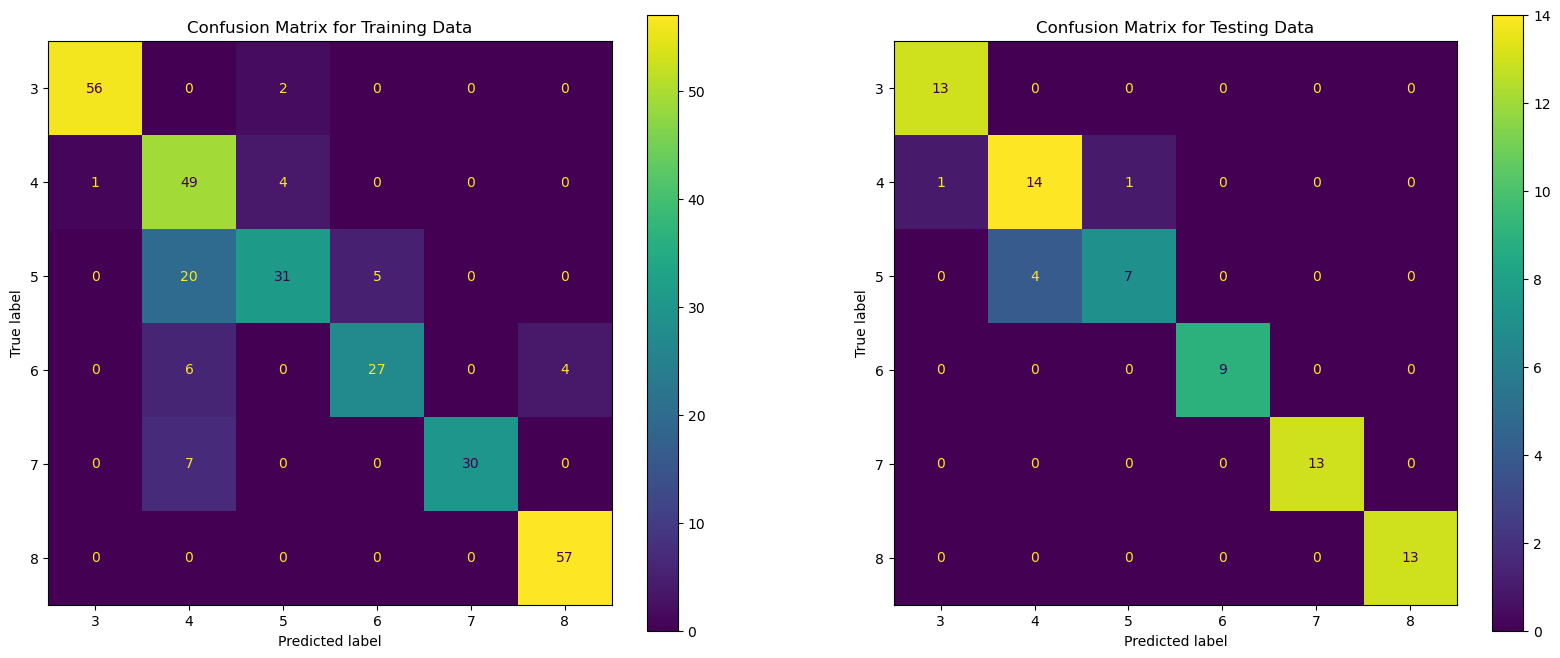

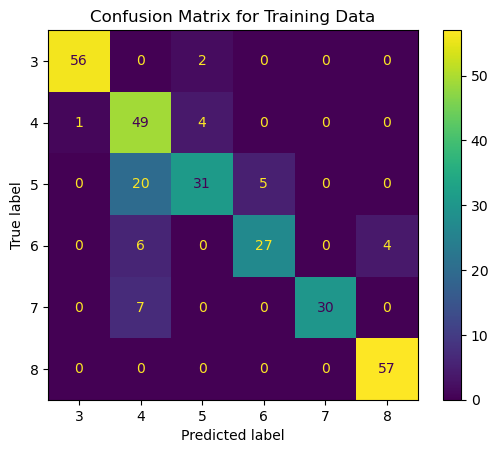

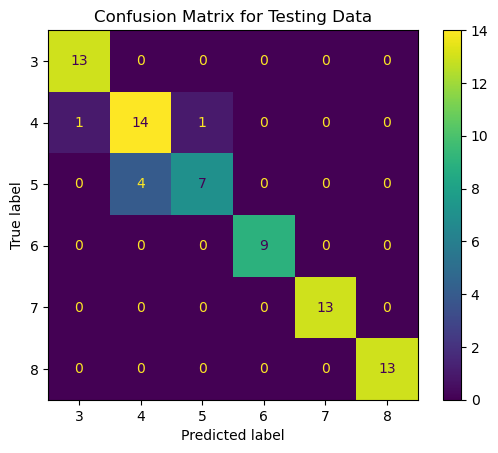

In [42]:
# logistic regression model

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# multinomial regression with cross validation for 10 folds
multi_logreg = LogisticRegressionCV(cv=10, multi_class='multinomial', solver='lbfgs', max_iter=1000, refit=True)
multi_logreg.fit(X_train, y_train)

# use multinomial logistic regression to predict on train and test sets
y_trainPredmulti = multi_logreg.predict(X_train)
y_testPredmulti = multi_logreg.predict(X_test)

# display accuracy for train and test sets
print('MLR Training Classification Report:',
      classification_report(y_train, y_trainPredmulti))
print(f'Accuracy: {accuracy_score(y_train, y_trainPredmulti)}\n')

print('MLR Testing Classification Report:',
      classification_report(y_test, y_testPredmulti))
print(f'Accuracy: {accuracy_score(y_test, y_testPredmulti)}')

# create confusion matrix for train and test sets
conf_mat_multi_train = confusion_matrix(y_train, y_trainPredmulti, labels=y_labels)
conf_mat_multi_test = confusion_matrix(y_test, y_testPredmulti, labels=y_labels)

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredmulti, ax=axes[0])
disptrain.plot()
axes[0].set_title("Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredmulti, ax=axes[1])
disptest.plot()
axes[1].set_title("Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()

NB Classification Train Report:               precision    recall  f1-score   support

           3       0.97      0.97      0.97        58
           4       0.22      0.03      0.06        58
           5       0.53      0.87      0.66        54
           6       0.88      0.76      0.82        38
           7       0.69      0.98      0.81        41
           8       0.94      1.00      0.97        50

    accuracy                           0.75       299
   macro avg       0.71      0.77      0.71       299
weighted avg       0.69      0.75      0.70       299

Train Accuracy: 0.7491638795986622

NB Classification Test Report:               precision    recall  f1-score   support

           3       1.00      1.00      1.00        13
           4       1.00      0.08      0.15        12
           5       0.62      1.00      0.76        13
           6       1.00      0.75      0.86         8
           7       0.69      1.00      0.82         9
           8       0.95      1.00

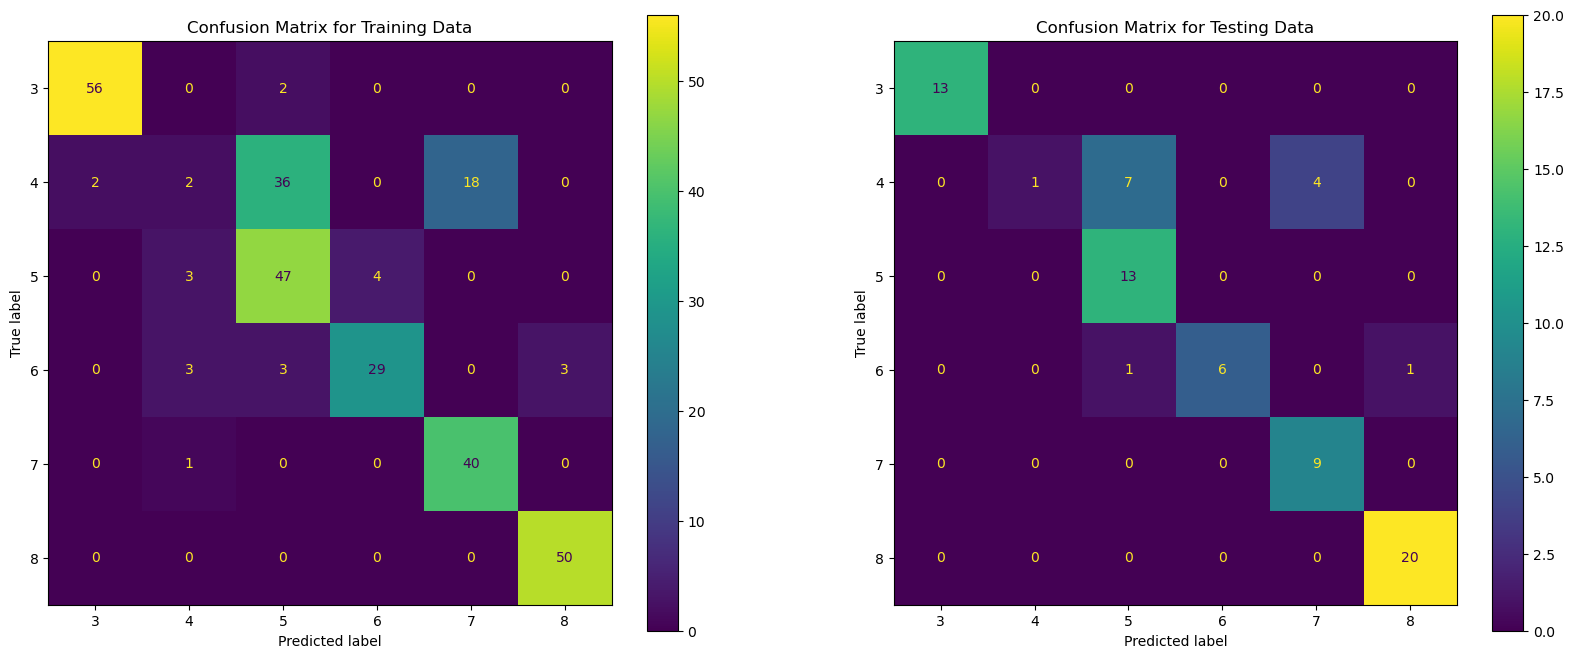

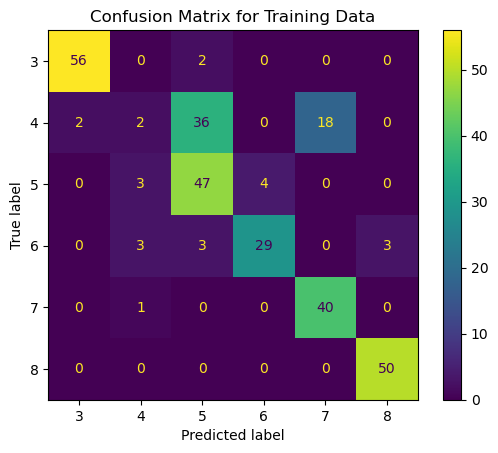

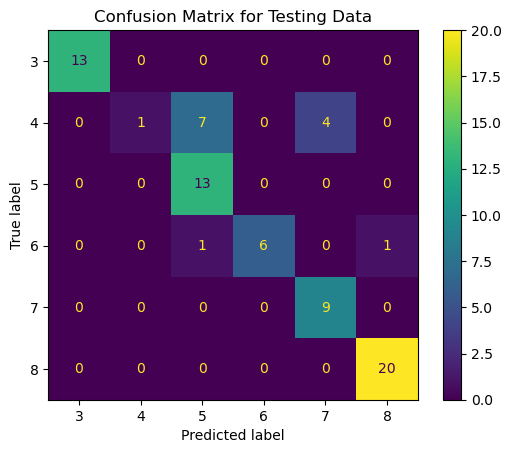

In [43]:
# naive bayes classification

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set up Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# use Naive Bayes to predict on train and test sets
y_trainPredNB = gnb.predict(X_train)
y_testPredNB = gnb.predict(X_test)

# display accuracy for train and test sets
print('NB Classification Train Report:',
      classification_report(y_train, y_trainPredNB))
print(f'Train Accuracy: {accuracy_score(y_train, y_trainPredNB)}\n')

print('NB Classification Test Report:',
      classification_report(y_test, y_testPredNB))
print(f'Test Accuracy: {accuracy_score(y_test, y_testPredNB)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredNB, ax=axes[0])
disptrain.plot()
axes[0].set_title("Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredNB, ax=axes[1])
disptest.plot()
axes[1].set_title("Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()

SVM Classification Train Report:               precision    recall  f1-score   support

           3       0.97      0.98      0.97        58
           4       0.60      0.87      0.71        55
           5       0.85      0.58      0.69        57
           6       0.84      0.68      0.75        31
           7       1.00      0.88      0.93        40
           8       0.95      1.00      0.97        58

    accuracy                           0.84       299
   macro avg       0.87      0.83      0.84       299
weighted avg       0.86      0.84      0.84       299

Accuracy Train: 0.842809364548495

SVM Classification Test Report:               precision    recall  f1-score   support

           3       1.00      0.92      0.96        13
           4       0.68      1.00      0.81        15
           5       0.83      0.50      0.62        10
           6       1.00      0.93      0.97        15
           7       1.00      0.80      0.89        10
           8       0.92      1.0

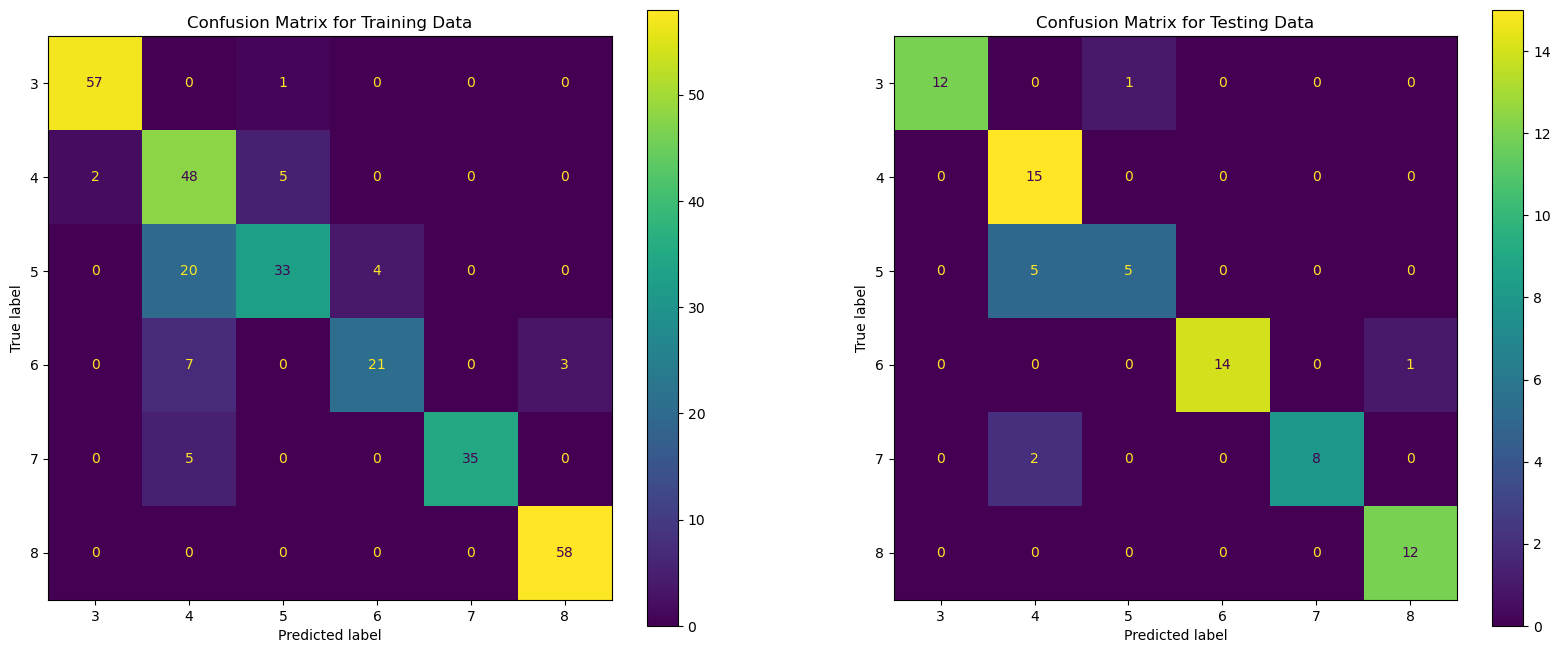

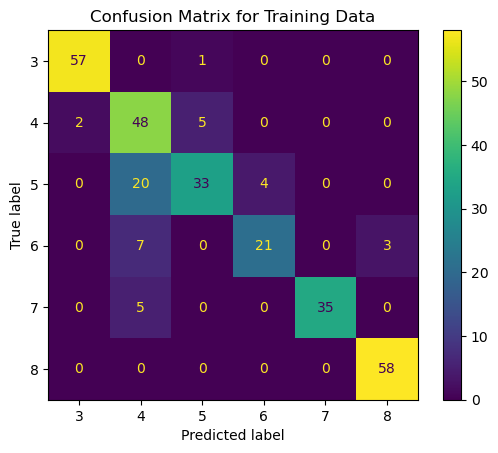

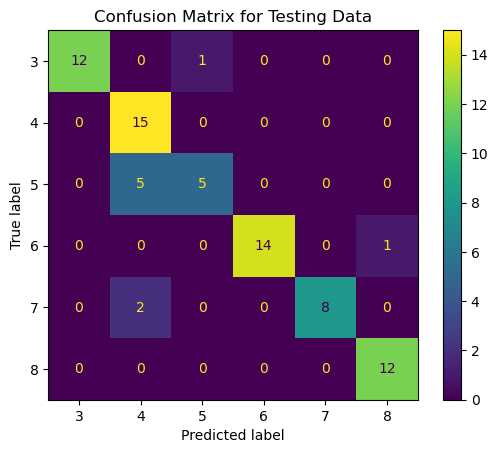

In [44]:
# creating a Support Vector Machine

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# creat Support Vector Machine model
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

# use SVM to predict on train and test sets
y_trainPredSVM = svm.predict(X_train)
y_testPredSVM = svm.predict(X_test)

# display accuracy for train and test sets
print('SVM Classification Train Report:',
      classification_report(y_train, y_trainPredSVM))
print(f'Accuracy Train: {accuracy_score(y_train, y_trainPredSVM)}\n')


print('SVM Classification Test Report:',
      classification_report(y_test, y_testPredSVM))
print(f'Accuracy Test: {accuracy_score(y_test, y_testPredSVM)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredSVM, ax=axes[0])
disptrain.plot()
axes[0].set_title("Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredSVM, ax=axes[1])
disptest.plot()
axes[1].set_title("Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()

# def convert_to_stress_level(x):
#       conditions = [x==0, (x > 0) & (x < 4), (x >= 4) & (x <= 7), (x > 7)]
#       choices = ["No Stress", "Low Stress", "Medium Stress", "High Stress"]

#       return np.select(conditions, choices)

# y_trainPredSVM = convert_to_stress_level(y_trainPredSVM)
# y_testPredSVM = convert_to_stress_level(y_testPredSVM)

# # Create Frequency Bar Plot for each Stress Level
# val, count = np.unique(y_trainPredSVM, return_counts=True)
# print(f'Predicted Train Values: {val}\nCount: {count}\n')
# freqPlot = sns.barplot(x=val, y=count).set_title('Predicted Train Values')
# plt.xlabel('Predicted Train Values')
# plt.ylabel('Frequency')
# plt.show(freqPlot)

# val, count = np.unique(y_testPredSVM, return_counts=True)
# print(f'Predicted Test Values: {val}\nCount: {count}\n')
# freqPlot = sns.barplot(x=val, y=count).set_title('Predicted Test Values')
# plt.xlabel('Predicted Test Values')
# plt.ylabel('Frequency')
# plt.show(freqPlot)

In [45]:
import pickle

# save models
pickle.dump(lr, open('linear_regression_model.pkl', 'wb'))
pickle.dump(multi_logreg, open('multinomial_logistic_regression_model.pkl', 'wb'))
pickle.dump(gnb, open('naive_bayes_model.pkl', 'wb'))
pickle.dump(svm, open('support_vector_machine_model.pkl', 'wb'))